In [4]:
import numpy as np
import matplotlib.pylab as plt

#from scipy import ndimage,misc

import os, sys
from PIL import Image

import cat_tools as ct


%matplotlib notebook

In [5]:
def jpg_image_to_array(image):
    """
    Loads JPEG image into 3D Numpy array of shape 
    (width, height, channels)
    """
    #print(image.size)
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    #print(im_arr)
    im_arr[im_arr>=0.5] = 255
    #print(im_arr)
    im_arr = im_arr.reshape((image.size[1], image.size[0],4))                                   
    return im_arr

In [6]:
#img = misc.imread('cat.png')
#img.shape

size = 128, 128

infilename = 'cat.png'
img = Image.open(infilename)

img.size


(960, 720)

In [20]:
#img

[(128, 128), (112, 112), (96, 96), (80, 80), (64, 64), (48, 48), (32, 32), (16, 16)]


<IPython.core.display.Javascript object>


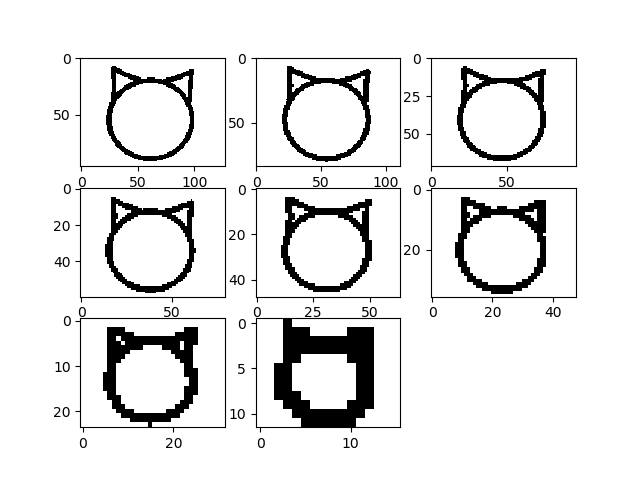

In [48]:
sizes = []
small_images = []
for i in range(0,8):
    a = 128 - i*16
    size = a,a
    sizes.append(size)
    im_temp = img.copy()
    #im_temp = im_temp.rotate(45)

    im_temp.thumbnail(size)
    im_temp = jpg_image_to_array(im_temp)
    
    h,w,d = im_temp.shape
    f = np.zeros((h,w))

    for iw in range(w):
        for jh in range(h):
            tot = im_temp[jh][iw].sum()
            if tot:
                f[jh][iw] = 1
    
    small_images.append(f)
    
print(sizes)

plt.figure()
for i in range(0,8):
    plt.subplot(3,3,i+1)
    plt.imshow(small_images[i],cmap='Greys')



In [40]:
h,w,d = small_images[0].shape


f = np.zeros((h,w))




In [41]:
for i in range(w):
    for j in range(h):
        tot = small_images[0][j][i].sum()
        if tot:
            f[j][i] = 1


<IPython.core.display.Javascript object>


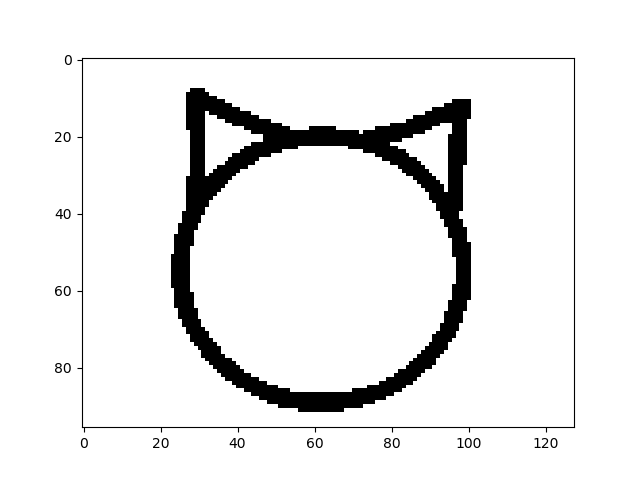

In [43]:
plt.figure()
plt.imshow(f,cmap='Greys')